In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import colorsys

In [2]:
imageNames = [
    "5436e3c6bae478396759f233.jpg",
    "5aaf1253116597691362835b.jpg",
    "5aaf12ba116597691362b671.jpg",
    "5aaf13841165976913631d42.jpg"
]

def readAndConvert(image):
    im = cv2.imread(image)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

images = [readAndConvert(image)for image in imageNames]

colorSpaceCount = 6

RGB = "RGB"
HSV = "HSV"
LUV = "LUV"
LUV_INVERTED = "LUV_INVERTED"
XYZ = "XYZ"
# "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
HSL = "HSL"
# GRAY = "GRAY"

def getImageSpaces(im_RGB):
    return {
        RGB: im_RGB,
        HSV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV),
        LUV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV),
        LUV_INVERTED: cv2.bitwise_not(cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV)),
        XYZ: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2XYZ),
        # "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
        HSL: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HLS)
#         GRAY: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2GRAY)

    }

def getSpaceLabels(space):
    if space is RGB:
        return ["Red", "Green", "Blue"]
    elif space is HSV:
        return ["Hue", "Saturation", "Value"]
    else:
        return ["x_label", "y_label", "z_label"]


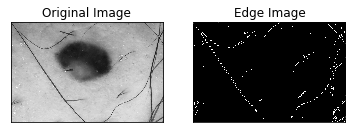

In [6]:
img = cv2.imread(imageNames[0],0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

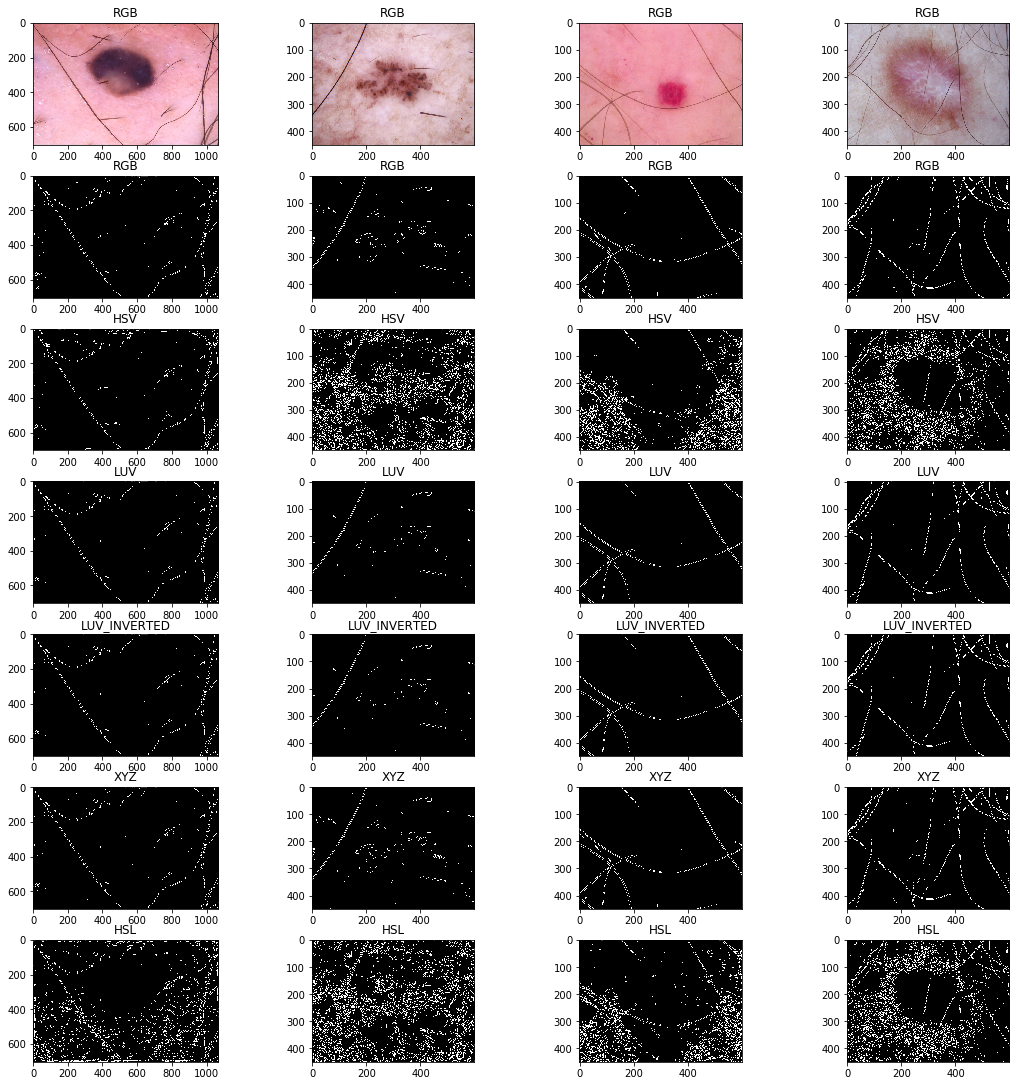

In [17]:
fig, axs = plt.subplots(colorSpaceCount + 1, len(imageNames), figsize=(15,15))
# fig.suptitle('Color Spaces')
fig.tight_layout(pad=1.0)

for i in range(len(images)):
    im = images[i]
#     im_RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imageSpaces = getImageSpaces(im)
    
    axs[0, i].set_title('RGB')
    axs[0, i].imshow(im)
    
    j = 1
    for key, value in imageSpaces.items():
        edges = cv2.Canny(value,100,200)
        axs[j, i].set_title(key)
        axs[j, i].imshow(edges,cmap = 'gray')
        j = j +1

In [1]:
# img = cv2.imread(imageNames[0], 1)
# cv2.imshow("img",img) 

# fig, axs = plt.subplots(1, 7, figsize=(15,15))
# # axs[j, i].set_title(key)
# # axs[j, i].imshow(edges,cmap = 'gray')

# i = 0
# j = 0

# #-----Converting image to LAB Color model----------------------------------- 
# lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# # cv2.imshow("lab",lab)
# axs[j].set_title('LAB')
# axs[j].imshow(lab)
# j = j + 1

# #-----Splitting the LAB image to different channels-------------------------
# l, a, b = cv2.split(lab)
# axs[j].imshow('l_channel', l)
# j = j + 1
# axs[j].imshow('a_channel', a)
# j = j + 1
# axs[j].imshow('b_channel', b)
# j = j + 1

# #-----Applying CLAHE to L-channel-------------------------------------------
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
# cl = clahe.apply(l)
# axs[j].imshow('CLAHE output', cl)
# j = j + 1

# #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
# limg = cv2.merge((cl,a,b))
# axs[j].imshow('limg', limg)
# j = j + 1

# #-----Converting image from LAB Color model to RGB model--------------------
# final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
# axs[j].imshow('final', final)


In [22]:
'''
Simple and fast image transforms to mimic:
 - brightness
 - contrast
 - erosion 
 - dilation
'''
def showContrast(imageNameIndex):
    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 1
    col = 3

    fig2, axs = plt.subplots(row,col,  figsize=(15,5))
    fig2.suptitle('Contrast')


    # Image data
    image = cv2.imread(imageNames[imageNameIndex],0) # load as 1-channel 8bit grayscale

    axs[0].set_title('Image')
    axs[0].imshow(image)
    maxIntensity = 255.0 # depends on dtype of image data
    x = arange(maxIntensity) 

    # Parameters for manipulating image data
    phi = 1
    theta = 1

    # Increase intensity such that
    # dark pixels become much brighter, 
    # bright pixels become slightly bright
    newImage0 = (maxIntensity/phi)*(image/(maxIntensity/theta))**0.5
    newImage0 = array(newImage0,dtype=uint8)

    axs[1].set_title('Image0')
    axs[1].imshow(newImage0)

    y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

    # Decrease intensity such that
    # dark pixels become much darker, 
    # bright pixels become slightly dark 
    newImage1 = (maxIntensity/phi)*(image/(maxIntensity/theta))**2
    newImage1 = array(newImage1,dtype=uint8)


    axs[2].set_title('Image1')
    axs[2].imshow(newImage1)

    z = (maxIntensity/phi)*(x/(maxIntensity/theta))**2

    # # Plot the figures
    # figure()
    # plot(x,y,'r-') # Increased brightness
    # plot(x,x,'k:') # Original image
    # plot(x,z, 'b-') # Decreased brightness
    # #axis('off')
    # axis('tight')
    # show()

    # # Close figure window and click on other window 
    # # Then press any keyboard key to close all windows
    # closeWindow = -1
    # while closeWindow<0:
    #     closeWindow = cv2.waitKey(1) 
    # cv2.destroyAllWindows()

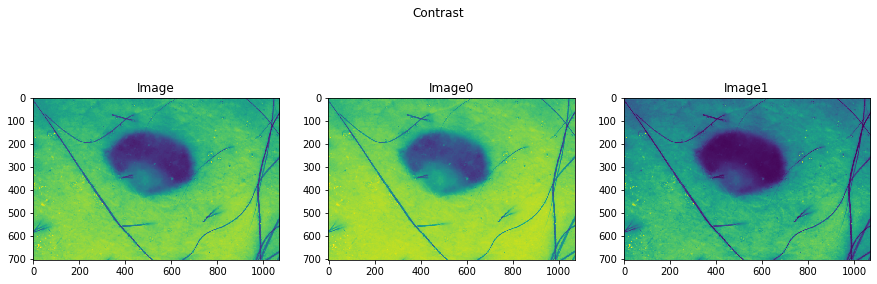

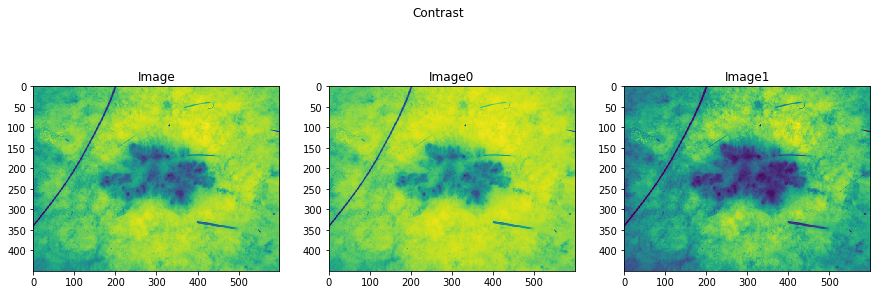

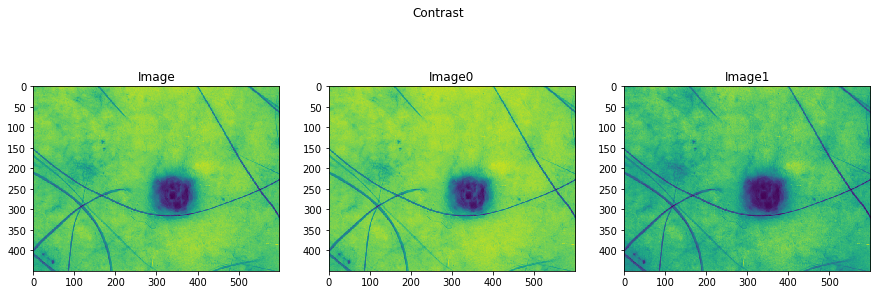

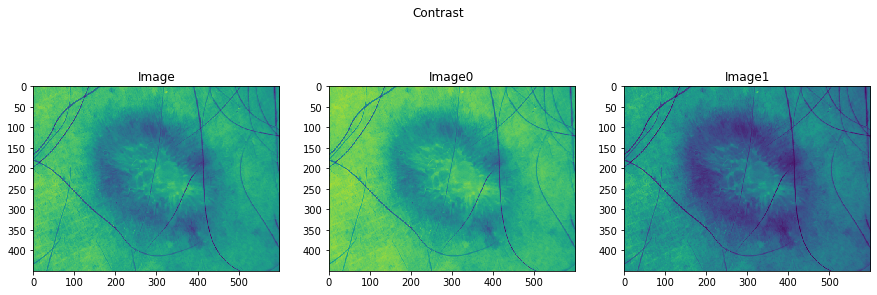

In [23]:
for i in range(4):
    showContrast(i)